<a href="https://colab.research.google.com/github/Dhananjayak24/SACAIM_Beta_secretase/blob/main/sacaim_part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/beta_secretase/betasecretase_06_bioactivity_data_2class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(8522, 160)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
np.random.seed(100)
model_reg = RandomForestRegressor(n_estimators=100)
model_reg.fit(X_train, Y_train)
r2 = model_reg.score(X_test, Y_test)
r2

0.5304874078442061

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [02:32<00:02,  2.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 6817, number of used features: 160
[LightGBM] [Info] Start training from score 6.831841


100%|██████████| 42/42 [02:33<00:00,  3.65s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [01:48<00:01,  1.31s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 6817, number of used features: 160
[LightGBM] [Info] Start training from score 6.831841


100%|██████████| 42/42 [01:48<00:00,  2.59s/it]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.84,0.85,0.54,0.24
ExtraTreeRegressor,0.84,0.85,0.54,0.26
ExtraTreesRegressor,0.84,0.85,0.54,13.67
GaussianProcessRegressor,0.84,0.85,0.54,34.69
RandomForestRegressor,0.82,0.82,0.58,9.22
BaggingRegressor,0.81,0.81,0.60,1.07
XGBRegressor,0.80,0.80,0.61,0.62
MLPRegressor,0.77,0.77,0.66,23.19
KNeighborsRegressor,0.68,0.69,0.77,0.69


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.51,0.56,0.93,0.57
HistGradientBoostingRegressor,0.51,0.55,0.94,5.45
LGBMRegressor,0.50,0.55,0.94,0.63
NuSVR,0.50,0.54,0.95,7.76
SVR,0.49,0.53,0.96,6.25
RandomForestRegressor,0.48,0.53,0.96,9.85
KNeighborsRegressor,0.47,0.52,0.97,0.27
MLPRegressor,0.46,0.51,0.98,8.64
BaggingRegressor,0.46,0.51,0.99,1.39


In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Bar plot of R-squared values
sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train, ax=axes[0])
axes[0].set(xlim=(0, 1))
axes[0].set_title("R-Squared Values")

# Bar plot of RMSE values
sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train, ax=axes[1])
axes[1].set(xlim=(0, 10))
axes[1].set_title("RMSE Values")

# Bar plot of calculation time
sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train, ax=axes[2])
axes[2].set(xlim=(0, 10))
axes[2].set_title("Calculation Time")

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


In [ ]:
predictions_train = pd.DataFrame(predictions_train)

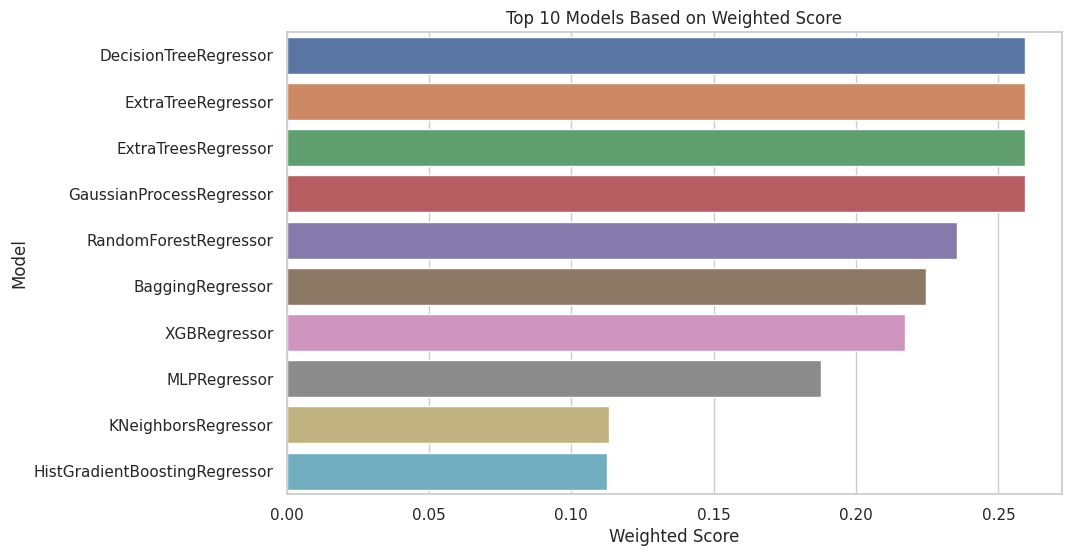

Top 10 Models:
                            Model  R-Squared  RMSE  Time Taken
1           DecisionTreeRegressor       0.85  0.54        0.24
2              ExtraTreeRegressor       0.85  0.54        0.26
3             ExtraTreesRegressor       0.85  0.54       13.67
4        GaussianProcessRegressor       0.85  0.54       34.69
5           RandomForestRegressor       0.82  0.58        9.22
6                BaggingRegressor       0.81  0.60        1.07
7                    XGBRegressor       0.80  0.61        0.62
8                    MLPRegressor       0.77  0.66       23.19
9             KNeighborsRegressor       0.69  0.77        0.69
10  HistGradientBoostingRegressor       0.69  0.77        3.44


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Rank models based on weighted scores (you can adjust weights based on your priority)
weights = {'R-Squared': 0.5, 'RMSE': -0.3, 'Time Taken': 0 }
predictions_train['Weighted Score'] = (
    weights['R-Squared'] * predictions_train['R-Squared'] +
    weights['RMSE'] * predictions_train['RMSE'] +
    weights['Time Taken'] * predictions_train['Time Taken']
)

# Select top 10 models
top_models = predictions_train.nlargest(10, 'Weighted Score').reset_index()

# Plot the ranking
plt.figure(figsize=(10, 6))
sns.barplot(x='Weighted Score', y='Model', data=top_models)
plt.title('Top 10 Models Based on Weighted Score')
plt.xlabel('Weighted Score')
plt.ylabel('Model')
plt.show()

# Display the details of top models
top_models.index = top_models.index + 1
print("Top 10 Models:")
print(top_models[['Model', 'R-Squared', 'RMSE', 'Time Taken']])


In [ ]:
print(top_models)

                           Model  Adjusted R-Squared  R-Squared  RMSE  \
0          DecisionTreeRegressor                0.84       0.85  0.54   
1             ExtraTreeRegressor                0.84       0.85  0.54   
2            ExtraTreesRegressor                0.84       0.85  0.54   
3       GaussianProcessRegressor                0.84       0.85  0.54   
4          RandomForestRegressor                0.82       0.82  0.58   
5               BaggingRegressor                0.81       0.81  0.60   
6                   XGBRegressor                0.80       0.80  0.61   
7                   MLPRegressor                0.77       0.77  0.66   
8            KNeighborsRegressor                0.68       0.69  0.77   
9  HistGradientBoostingRegressor                0.68       0.69  0.77   

   Time Taken  Weighted Score  
0        0.24            0.26  
1        0.26            0.26  
2       13.67            0.26  
3       34.69            0.26  
4        9.22            0.24  
5   